In [3]:
from genericHeader import *
from steamTable import *
from SteamSystem import *
from IPython.core.display import HTML

# Steam System Overview
<img src='pics\steamHeaderTopology.png'>


$F_{PB},F_{HP},F_{LP}$ = Power Boiler, HP Pressure Reducing Valve (PRV), & LP PRV Mass Flows $[kpph]$

$F_1,F_{12},F_{13}$ = TG1 Steam Mass Flows $[kpph]$

$F_2,F_{22},F_{23},F_{24}$ = TG2 Steam Mass Flows $[kpph]$

$P_i$ = Steam Pressures $[psig]$

$T_i$ = Steam Temperatures $[^o F]$

$H_i$ = Steam Specific Enthalpies $[btu/lb]$

$J_{ik}$ = Generator Section Electricity Productions $[MW]$

In [4]:
ss = SteamSystem()
display(HTML(ss.cons_df.to_html()))
display(HTML(ss.attr_df.to_html()))
display(HTML(ss.mb_lhs_df.to_html()))
display(ss.mb_rhs_df)

,$F_{HP}$,$F_{LP}$,$F_{1}$,$F_{12}$,$F_{13}$,$F_{2}$,$F_{22}$,$F_{23}$,$F_{24}$,$F_{V}$
constraint,,,,,,,,,,
Min,0.0,0.0,50.0,0.0,50.0,50.0,0.0,0.0,50.0,0.0
Max,400.0,400.0,500.0,450.0,500.0,500.0,200.0,350.0,150.0,500.0


,HP Header,IP Header,LP Header,Condenser
attribute,,,,
PSIG,850.0,170.0,50.0,-13.5
deg F,825.0,440.0,300.0,110.0
BTU/LB,1410.0,1237.0,1180.0,1109.0


,$F_{HP}$,$F_{LP}$,$F_{1}$,$F_{12}$,$F_{13}$,$F_{2}$,$F_{22}$,$F_{23}$,$F_{24}$,$F_{V}$
equation,,,,,,,,,,
HP,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
IP,1.0,-1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
LP,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.0
TG1,0.0,0.0,1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0
TG2,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,-1.0,0.0


,$F_{PB}$,$F_{L1}$,$F_{L2}$,$F_{L3}$
equation,,,,
HP,-1.0,1.0,0.0,0.0
IP,0.0,0.0,1.0,0.0
LP,0.0,0.0,0.0,1.0
TG1,0.0,0.0,0.0,0.0
TG2,0.0,0.0,0.0,0.0


## Mass Balances / Equality Constraints
\begin{equation}
F_{PB} - F_1 - F_2 - F_{HP} - F_{L1} = 0 \label{eq:HP Header Balance} \tag{HP}
\end{equation}

\begin{equation}
F_{12} + F_{22} + F_{HP} - F_{LP} -  F_{L2} = 0 \label{eq:IP Header Balance} \tag{IP}
\end{equation}

\begin{equation}
F_{13} + F_{23} + F_{LP} - F_{V} -  F_{L3} = 0 \label{eq:LP Header Balance} \tag{LP}
\end{equation}

\begin{equation}
F_{1} - F_{12} - F_{13} = 0 \label{eq:TG1 Balance} \tag{TG1}
\end{equation}

\begin{equation}
F_{2} - F_{22} - F_{23} - F_{24} = 0 \label{eq:TG2 Balance} \tag{TG2}
\end{equation}

Consider $F_{PB}, F_{L1}, F_{L2}, F_{L3}$ as constants for a given operational scenario, then:



\begin{equation}
\begin{bmatrix} -1 & 0 & -1 & 0 & 0 & -1 & 0 & 0 & 0 & 0 \\
1 & -1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & -1 \\
0 & 0 & 1 & -1 & -1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & -1 & -1 & -1 & 0 \end{bmatrix}
\begin{bmatrix} F_{HP}\\F_{LP}\\F_{1}\\F_{12}\\F_{13}\\F_{2}\\F_{22}\\F_{23}\\F_{24}\\F_{V}\end{bmatrix} = 
\begin{bmatrix} -1  & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 \end{bmatrix}
\begin{bmatrix} F_{PB}\\F_{L1}\\F_{L2}\\F_{L3}\end{bmatrix}
\end{equation}

## Equipment Limits/Inequality Constraints
\begin{equation}
- F_{HP} \le -F_{HP,min} \label{eq:HP min} \tag{$F_{HP}$ min}
\end{equation}
\begin{equation}
F_{HP} \le F_{HP,max} \label{eq:Fhp max} \tag{$F_{HP}$ max}
\end{equation}

\begin{equation}
- F_{LP} \le -F_{LP,min} \label{eq:LP min} \tag{$F_{HP}$ min}
\end{equation}
\begin{equation}
F_{LP} \le F_{LP,max} \label{eq:FLP max} \tag{$F_{LP}$ max}
\end{equation}

\begin{equation}
- F_{1} \le -F_{1,min} \label{eq:F1 min} \tag{$F_{1}$ min}
\end{equation}
\begin{equation}
F_{1} \le F_{1,max} \label{eq:F1 max} \tag{$F_{1}$ max}
\end{equation}

\begin{equation}
- F_{12} \le -F_{12,min} \label{eq:F12 min} \tag{$F_{12}$ min}
\end{equation}
\begin{equation}
F_{12} \le F_{12,max} \label{eq:F12 max} \tag{$F_{12}$ max}
\end{equation}

\begin{equation}
- F_{13} \le -F_{13,min} \label{eq:F13 min} \tag{$F_{13}$ min}
\end{equation}
\begin{equation}
F_{13} \le F_{13,max} \label{eq:F13 max} \tag{$F_{13}$ max}
\end{equation}

\begin{equation}
- F_{2} \le -F_{2,min} \label{eq:F2 min} \tag{$F_{2}$ min}
\end{equation}
\begin{equation}
F_{2} \le F_{2,max} \label{eq:F2 max} \tag{$F_{2}$ max}
\end{equation}

\begin{equation}
- F_{22} \le -F_{22,min} \label{eq:F22 min} \tag{$F_{22}$ min}
\end{equation}
\begin{equation}
F_{22} \le F_{22,max} \label{eq:F22 max} \tag{$F_{22}$ max}
\end{equation}

\begin{equation}
- F_{23} \le -F_{23,min} \label{eq:F23 min} \tag{$F_{23}$ min}
\end{equation}
\begin{equation}
F_{23} \le F_{23,max} \label{eq:F23 max} \tag{$F_{23}$ max}
\end{equation}

\begin{equation}
- F_{24} \le -F_{24,min} \label{eq:F24 min} \tag{$F_{24}$ min}
\end{equation}
\begin{equation}
F_{24} \le F_{24,max} \label{eq:F24 max} \tag{$F_{24}$ max}
\end{equation}

\begin{equation}
- F_{V} \le -F_{V,min} \label{eq:FV min} \tag{$F_{V}$ min}
\end{equation}
\begin{equation}
F_{V} \le F_{V,max} \label{eq:FV max} \tag{$F_{V}$ max}
\end{equation}

#### And all variables must be non-negative

## Electrical Production/Objective Function
\begin{equation}
J_{11} = F_{1} (H_1 - H_2) \label{eq:J11} \tag{$J_{11}$}
\end{equation}

\begin{equation}
J_{12} = F_{13} (H_2 - H_3) \label{eq:J12} \tag{$J_{12}$}
\end{equation}

\begin{equation}
J_{21} = F_{2} (H_1 - H_2) \label{eq:J21} \tag{$J_{21}$}
\end{equation}

\begin{equation}
J_{22} = (F_{2} - F_{22}) (H_2 - H_3) \label{eq:J22} \tag{$J_{22}$}
\end{equation}

\begin{equation}
J_{23} = F_{24} (H_3 - H_4) \label{eq:J23} \tag{$J_{23}$}
\end{equation}

### Maximize
\begin{equation}
J = \sum_{i} \sum_{k} J_{i,k}
\end{equation}

In vector form:
\begin{equation}
J = \begin{bmatrix} 0, & 0, & (H_1 - H_2), & 0, & (H_2 - H_3), & (H_1 - H_3), & (H_3 - H_2), & 0, & (H_3 - H_4), & 0 \end{bmatrix}
\begin{bmatrix} F_{HP}\\F_{LP}\\F_{1}\\F_{12}\\F_{13}\\F_{2}\\F_{22}\\F_{23}\\F_{24}\\F_{V}\end{bmatrix}
\end{equation}

So the Problem Statement in Canonical Form is:

## Minimize
$-J = -\sum_{i} \sum_{k} J_{i,k}$

### Subject To
#### Mass Balances / Equality Constraints
#### Equipment Limits/Inequality Constraints

In [5]:
operating_conditions = np.array([1100,20,550,400])

In [6]:
display(ss.runScipyLP(operating_conditions).style.hide_index())
display(ss.opt)
display(ss.checkResult())

C:\Users\SESA703683\AppData\Local\Temp\ipykernel_14444\2663850020.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(ss.runScipyLP(operating_conditions).style.hide_index())


$F_{HP}$,$F_{LP}$,$F_{1}$,$F_{12}$,$F_{13}$,$F_{2}$,$F_{22}$,$F_{23}$,$F_{24}$,$F_{V}$
80.000000,0.000000,500.000000,450.000000,50.000000,500.000000,20.000000,350.000000,130.000000,0.000000


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -62.260003239999996
       x: [ 8.000e+01  0.000e+00  5.000e+02  4.500e+02  5.000e+01
            5.000e+02  2.000e+01  3.500e+02  1.300e+02  0.000e+00]
     nit: 17

True

In [10]:
test_conditions = np.array([
    [1100, 20, 550, 400],
    [900, 10, 400, 400],
    [1415, 15, 250, 900],
    [1000, 15, 250, 250],
    [800, 100, 350, 300]
])


for row in range(test_conditions.shape[0]):
    display(ss.runScipyLP(test_conditions[row,:]).style.hide(axis='index'))
    display(ss.opt.message)
    print('='*40)


$F_{HP}$,$F_{LP}$,$F_{1}$,$F_{12}$,$F_{13}$,$F_{2}$,$F_{22}$,$F_{23}$,$F_{24}$,$F_{V}$
80.000000,0.000000,500.000000,450.000000,50.000000,500.000000,20.000000,350.000000,130.000000,0.000000


'Optimization terminated successfully.'

$F_{HP}$,$F_{LP}$,$F_{1}$,$F_{12}$,$F_{13}$,$F_{2}$,$F_{22}$,$F_{23}$,$F_{24}$,$F_{V}$
0.000000,0.000000,390.000000,340.000000,50.000000,500.000000,60.000000,350.000000,90.000000,0.000000


'Optimization terminated successfully.'

$F_{HP}$,$F_{LP}$,$F_{1}$,$F_{12}$,$F_{13}$,$F_{2}$,$F_{22}$,$F_{23}$,$F_{24}$,$F_{V}$
400.000000,150.000000,500.000000,0.000000,500.000000,500.000000,0.000000,350.000000,150.000000,100.000000


'Optimization terminated successfully.'

$F_{HP}$,$F_{LP}$,$F_{1}$,$F_{12}$,$F_{13}$,$F_{2}$,$F_{22}$,$F_{23}$,$F_{24}$,$F_{V}$
0.000000,0.000000,485.000000,250.000000,235.000000,500.000000,0.000000,350.000000,150.000000,335.000000


'Optimization terminated successfully.'

$F_{HP}$,$F_{LP}$,$F_{1}$,$F_{12}$,$F_{13}$,$F_{2}$,$F_{22}$,$F_{23}$,$F_{24}$,$F_{V}$
0.000000,0.000000,200.000000,150.000000,50.000000,500.000000,200.000000,250.000000,50.000000,0.000000


'Optimization terminated successfully.'

Scipy Solution


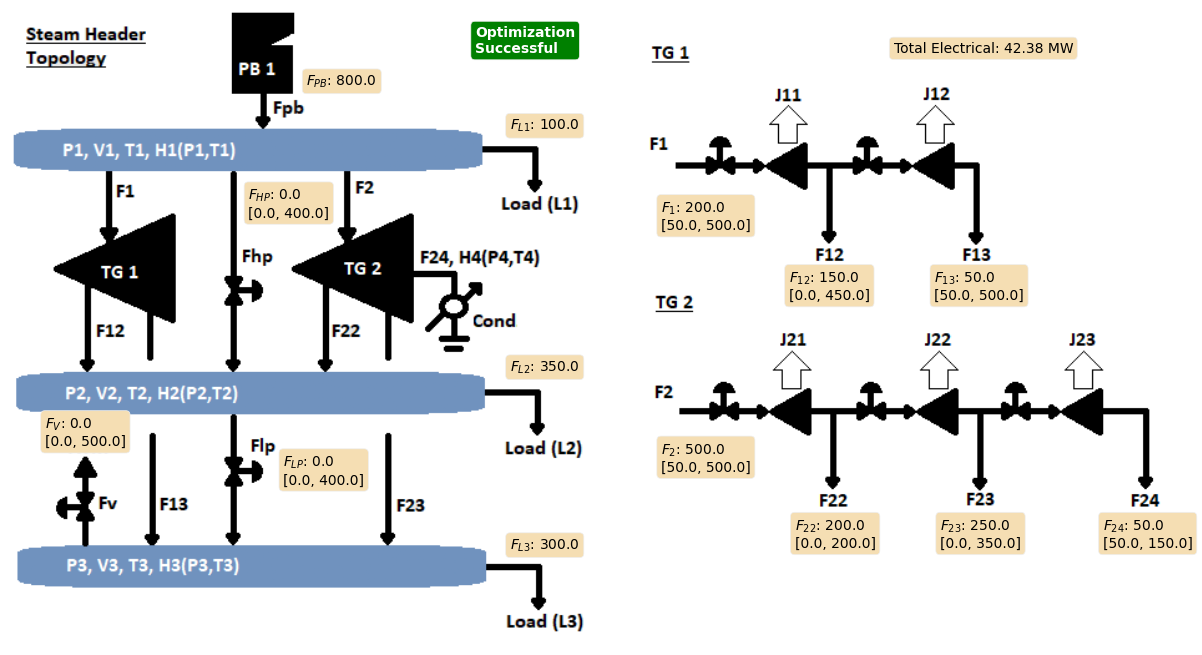

In [8]:
print('Scipy Solution')
ss.plotResults()

$F_{HP}$,$F_{LP}$,$F_{1}$,$F_{12}$,$F_{13}$,$F_{2}$,$F_{22}$,$F_{23}$,$F_{24}$,$F_{V}$
400.000000,150.000000,500.000000,0.000000,500.000000,500.000000,0.000000,350.000000,150.000000,100.000000


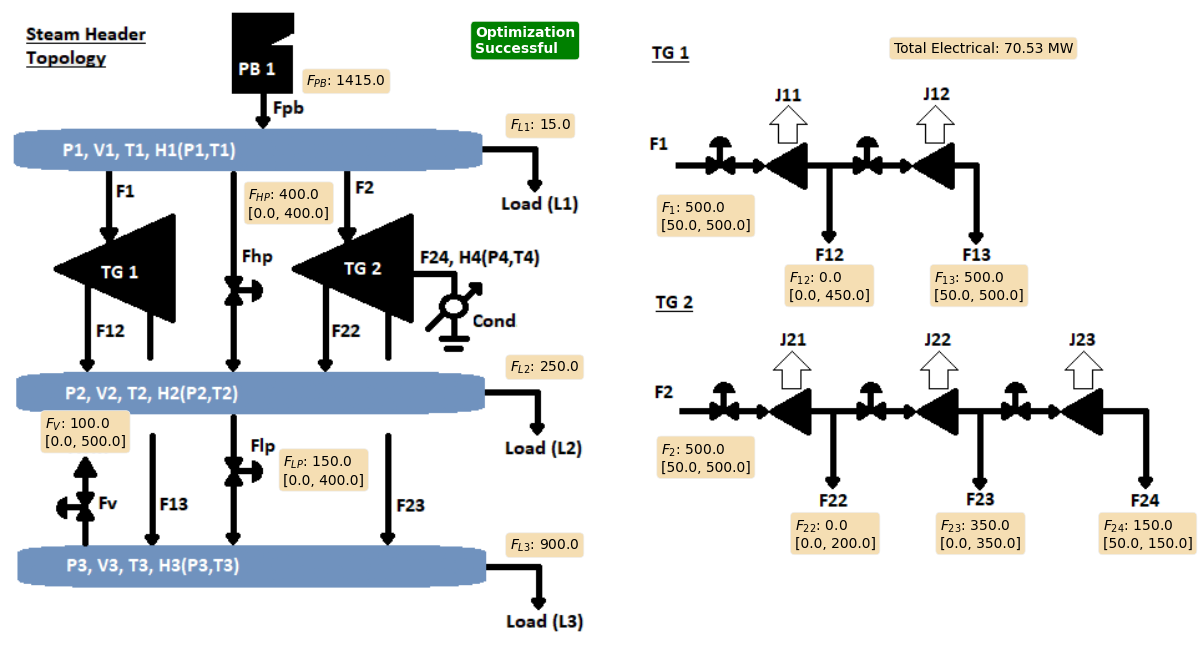

In [11]:
'''Methods = glpk (simplex GNU LP Kit), None (LP cone), mosek (3rd party solver $$)'''
display(ss.runCvxoptLP(test_conditions[2,:],method='glpk').style.hide(axis='index'))
#display(ss.opt)
#display(ss.checkResult())
ss.plotResults()



69.77727439
True


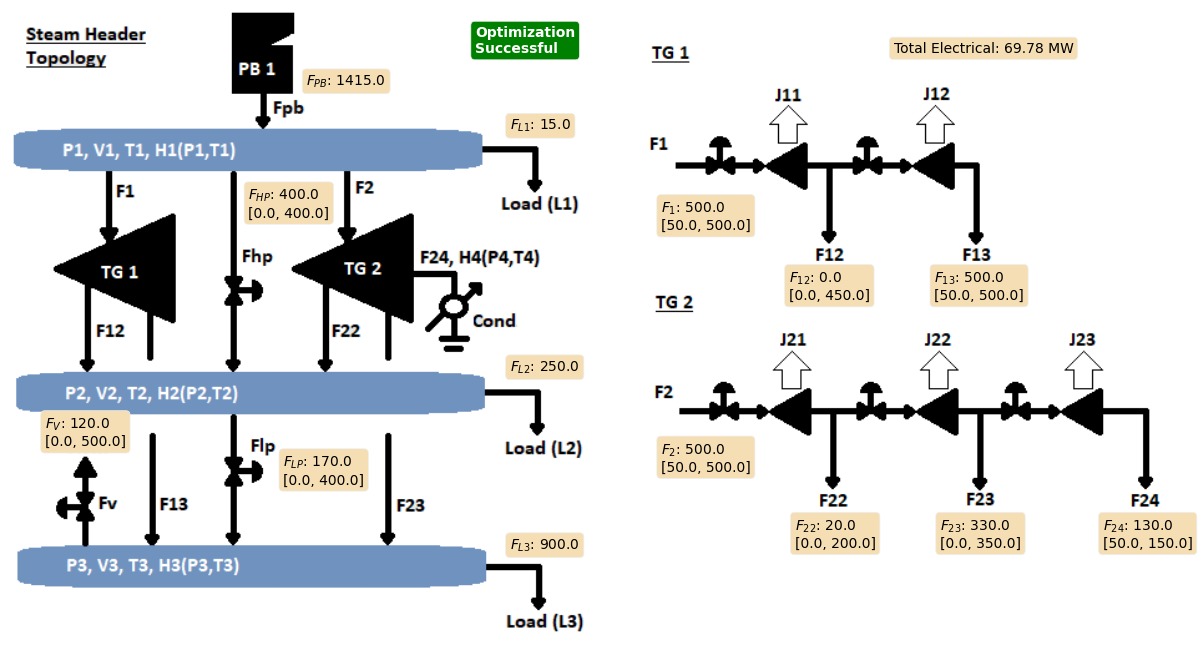

In [12]:
move = 20
ss.X[1] = ss.X[1] + move
ss.X[7] = ss.X[7] - move
ss.X[6] = ss.X[6] + move
ss.X[8] = ss.X[8] - move
ss.X[-1] = ss.X[-1] + move
print(np.matmul(ss.X,ss.c))
print(ss.checkResult())
ss.plotResults()

In [13]:
(70.53 - 69.78)*24*350*50

315000.0

In [15]:
!pip freeze > requirements.txt